In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df=pd.read_csv("Zoo.csv")
df.isnull().sum()
df.rename(columns={"animal name":"animalname"},inplace=True)
#Dummies
dummies=pd.get_dummies(df["animalname"])


In [10]:
df1=pd.concat([df,dummies],axis=1)
df1=df1.drop(["animalname"],axis=1)


In [11]:
labels=df1.iloc[:,16]
features=df1.drop(["type"],axis=1)

In [12]:
#Normalize the Function
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)
data=norm_func(features)

In [13]:
#Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KN
model=KN(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
#Train Accuracy
Train_acc=np.mean(model.predict(X_train)==Y_train)

In [22]:
#Test Accuracy
Test_acc=np.mean(model.predict(X_test)==Y_test)

In [23]:
model1=KN(n_neighbors=6)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
acc=[]
#decide k values
for i in range(6,50,2):
     model1=KN(n_neighbors=i)
     model1.fit(X_train,Y_train)
     train_accuracy=np.mean(model1.predict(X_train)==Y_train)
     test_accuracy=np.mean(model1.predict(X_test)==Y_test)
     acc.append([train_accuracy,test_accuracy])

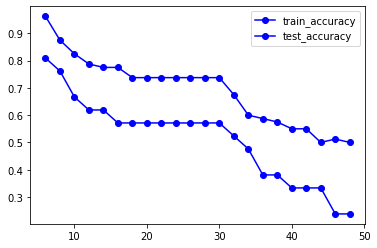

In [27]:
plt.plot(np.arange(6,50,2),[i[0] for i in acc],"bo-")
plt.plot(np.arange(6,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train_accuracy", "test_accuracy"])

In [28]:
#Select K=17
model_fin=KN(n_neighbors=24)
model_fin.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=24)

In [29]:
train_fin=np.mean(model_fin.predict(X_train)==Y_train)
test_fin=np.mean(model_fin.predict(X_test)==Y_test)